# Stroke Prediction
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
## Task:
The World Health Organization has declared that stroke is the second leading cause of death globally. My goal is to create a binary classification model that utilizes ten features to predict whether an individual will have a stroke. I will use and compare linear regression, linear regression, and random forest models.
Link to recording of presentation: https://www.loom.com/share/5e1a052f489042569fbe32d65d1dbd2b 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploration
- Viewing the dataframe
- Attribute information
- Checking for missing values
- Checking for imbalance
- Data descrpition

In [2]:
# Import and display the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Attribute Information (from dataset description on Kaggle)
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
# Gather information about the data (Shape, feature types, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Describe the data (count, mean, std, etc.)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:ylabel='stroke'>

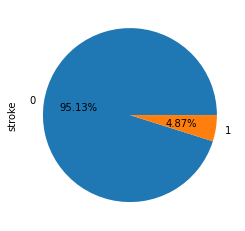

In [6]:
# Percentage of people in that had a stroke
df.stroke.value_counts().plot.pie(autopct='%.2f%%')

In [7]:
# Check how many "others" are in gender
df['gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object>

In [8]:
# Check how many "unknowns" in smoking status
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

## Data Preprocessing
- Dealing with missing values
- Encoding categorical features
- Scaling features
- Dealing with target variable imbalance
- Checking for colinearity issues

In [9]:
# Impute missing values in bmi with mean
df.fillna(df.mean(), inplace=True)

/var/folders/bj/jv__kr312152gh17n2x5mqfh0000gn/T/ipykernel_52604/597795885.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [10]:
# Drop the ID column
df.drop('id', axis=1, inplace=True)

In [11]:
# Drop other in gender
df.drop(df[df['gender'] == 'other'].index, inplace=True)

In [12]:
# Drop unknown values for smoking status
df.drop(df[df['smoking_status'] == 'unknown'].index, inplace=True)

In [13]:
# Convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cateogrical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cateogrical_vars:
    df[col] = le.fit_transform(df[col])

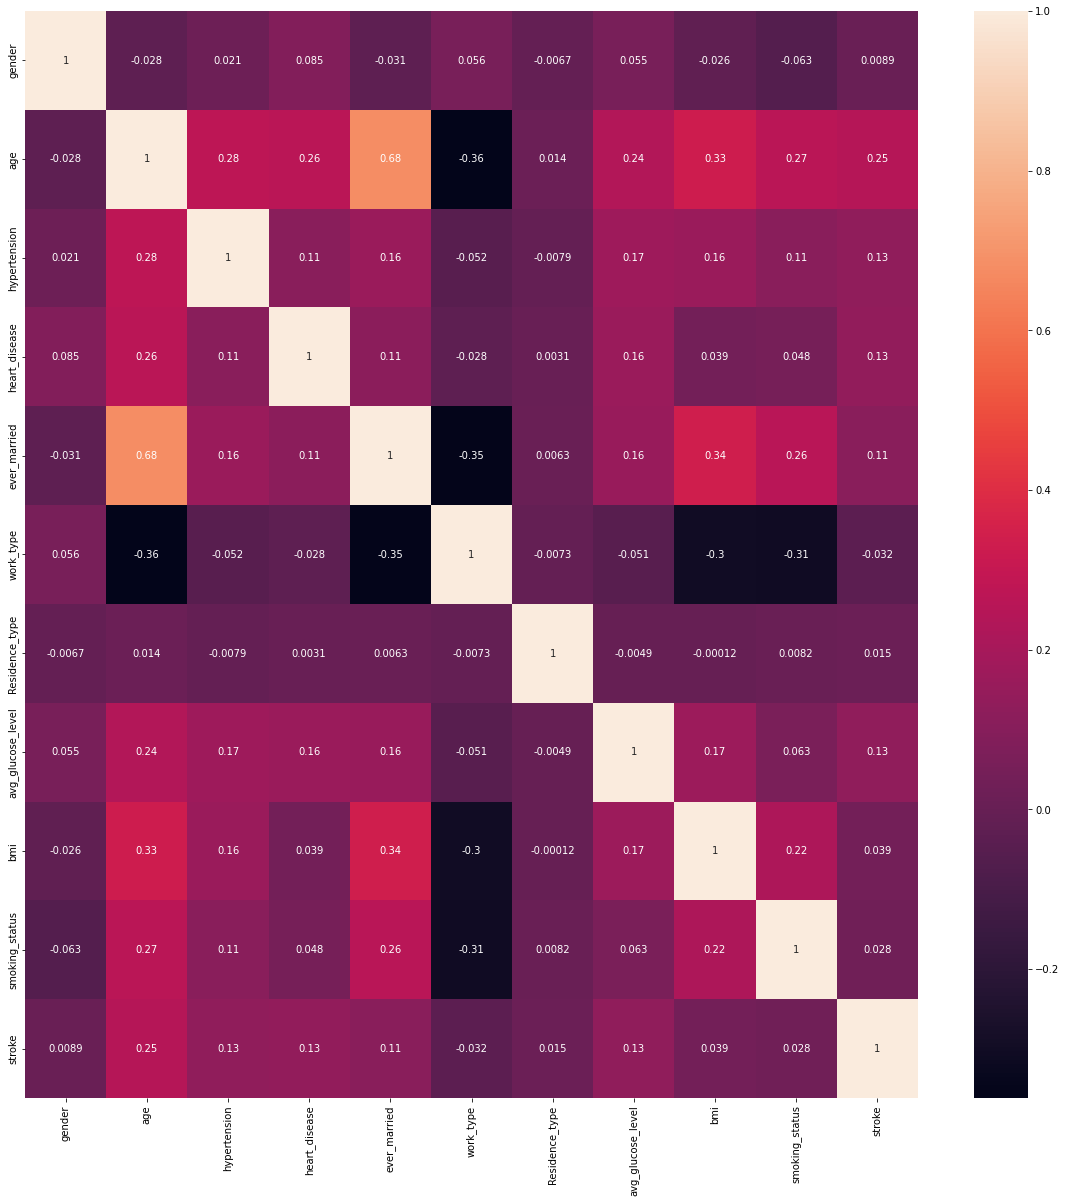

In [14]:
# Correlation Heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
# Deal with the imbalance of the data through oversampling technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [18]:
# Check shape of the training data after oversampling technique
print(X_train.shape)
print(y_train.shape)

(7802, 10)
(7802,)


## Model Tuning, Training, and Evaluation
- Parameter tuning
- Training logistic regression, random forest, and naive bayes models on the training data
- Compare model performace

In [19]:
comparison = {}

In [20]:
# Tune the hyperparameters of the logistic regression model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.7918492071308972


/Users/charliesabino/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/charliesabino/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/charliesabino/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/charliesabino/opt/anaconda3/lib/python3.9/site-packages/sklearn/

In [21]:
# Fit a logistic regression model to the training data and predict on the test data
logreg = LogisticRegression(C=0.1, penalty='l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.17      0.76      0.27        62

    accuracy                           0.76      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.93      0.76      0.82      1022

ROC AUC Score: 0.7576780913978495


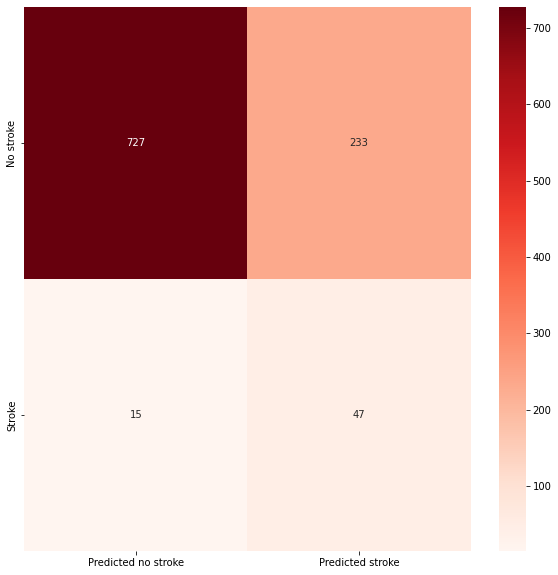

In [22]:
# Evaluate logistic regression model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
comparison['Logistic Regression'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt = 'd', yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [23]:
# Tune the hyperparameters of the random forest model
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy']}
gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9679639843724352
{'criterion': 'entropy', 'n_estimators': 200}


In [24]:
# Fit a random forest model to the training data and predict on the test data
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.21      0.13      0.16        62

    accuracy                           0.92      1022
   macro avg       0.58      0.55      0.56      1022
weighted avg       0.90      0.92      0.91      1022

ROC AUC Score: 0.5488911290322581


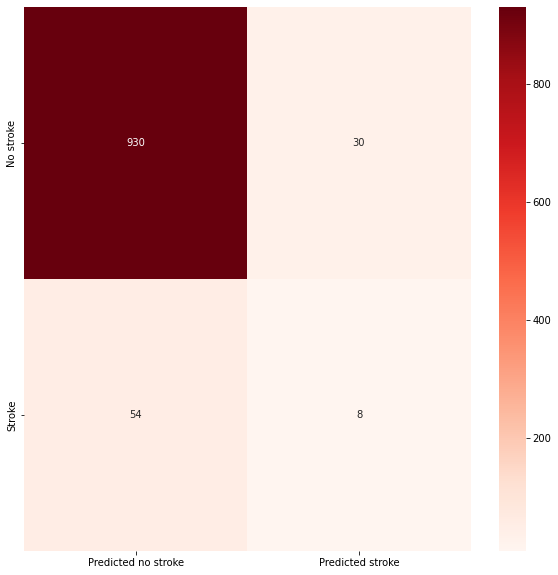

In [25]:
# Evaluate random forest model performance
comparison['Random Forest'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt = 'd', yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [26]:
# Tune the hyperparameters of the naive bayes model
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}
gs = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, scoring='accuracy', cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'var_smoothing': 1e-09}
0.7801874651170425


In [27]:
# Fit a naive bayes model to the training data and predict on the test data
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.74      0.24        62

    accuracy                           0.72      1022
   macro avg       0.56      0.73      0.54      1022
weighted avg       0.93      0.72      0.79      1022

ROC AUC Score: 0.7313844086021505


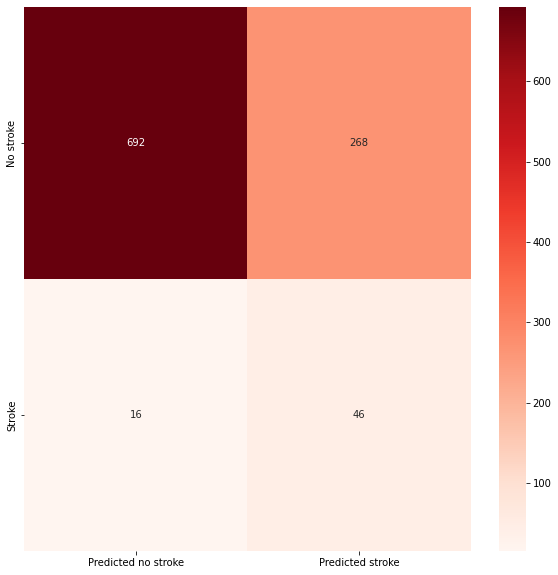

In [28]:
# Evaluate naive bayes model performance
comparison['Naive Bayes'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap = 'Reds', annot=True, fmt = 'd', yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [29]:
# Table comparing the performance of the models
comparison_df = pd.DataFrame.from_dict(comparison).T
comparison_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
comparison_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Logistic Regression,0.757339,0.167857,0.758065,0.274854,0.757678
Random Forest,0.917808,0.210526,0.129032,0.160000,0.548891
Naive Bayes,0.722114,0.146497,0.741935,0.244681,0.731384


## Result Analysis
- Top coefficient features for each class
- Classification failures

In [30]:
# Interpreting model performance of the logistic regression model
coef = pd.Series(logreg.coef_[0], index=X.columns)
coef.sort_values(ascending=False)

age                  1.901141
avg_glucose_level    0.249191
work_type            0.078258
hypertension         0.072976
heart_disease        0.055861
smoking_status       0.023369
Residence_type      -0.016644
gender              -0.019015
bmi                 -0.054796
ever_married        -0.093217
dtype: float64

In [31]:
# Misclassified samples in the logistic regression model
y_test = np.asarray(y_test)
misclassified = np.where(y_test != logreg.predict(X_test))
df.iloc[misclassified[0], :].head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
15,0,50.0,1,0,1,3,0,167.41,30.9,2,1


In [32]:
# Interpreting model performance for the random forest model 
coef = pd.Series(rfc.feature_importances_, index=X.columns)
coef.sort_values(ascending=False)

age                  0.349915
avg_glucose_level    0.133984
bmi                  0.126686
smoking_status       0.117807
work_type            0.115203
ever_married         0.057113
gender               0.032727
Residence_type       0.032553
hypertension         0.019601
heart_disease        0.014411
dtype: float64

In [33]:
# Misclassified samples in the random forest model
y_test = np.asarray(y_test)
misclassified = np.where(y_test != rfc.predict(X_test))
df.iloc[misclassified[0], :].head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
15,0,50.0,1,0,1,3,0,167.41,30.900000,2,1
52,0,79.0,0,1,1,2,0,127.29,27.700000,2,1
57,1,78.0,0,0,1,2,1,237.75,28.893237,1,1


In [34]:
# Interpreting model performance for the naive bayes model
# The naive bayes model does not have feature importances

In [35]:
# Misclassified samples in the naive bayes model
y_test = np.asarray(y_test)
misclassified = np.where(y_test != nb.predict(X_test))
df.iloc[misclassified[0], :].head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
14,0,79.0,0,1,1,2,1,214.09,28.2,2,1
